## 🏭 Predictive Maintenance – Machine Failure Classification

# 1. 🎯 Project Objective

The objective of this project is to predict whether an industrial machine will fail or not based on sensor measurements using supervised Machine Learning classification models.
Early detection of machine failures helps reduce maintenance costs, prevent downtime, and improve operational efficiency.

📌 Problem type: Binary Classification

📌 Learning type: Supervised Learning

# 2. 📂 Dataset Description

The dataset used in this project is the AI4I 2020 Predictive Maintenance Dataset, which contains simulated sensor data collected from industrial machines.

🔹 Input Features (X)

-Type – Type of the product (categorical: L, M, H)

-Air temperature [K] – Ambient air temperature

-Process temperature [K] – Process operating temperature

-Rotational speed [rpm] – Machine rotational speed

-Torque [Nm] – Torque applied by the machine

-Tool wear [min] – Tool wear time in minutes

🎯 Target Variable (y)

Machine failure

0 → No failure

1 → Failure

📌 Target variable: Machine failure

3.🔍 Exploratory Data Analysis (EDA)

After framing the problem, the dataset is loaded into a Pandas DataFrame to allow data inspection and further analysis

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"

df = pd.read_csv(url)

df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Display the dimensions (number of rows and columns) of the insurance dataset.

In [ ]:
df.shape

(10000, 14)

Show a summary of the insurance dataset, including column names, data types, and non-null counts.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Target Variable Analysis

In [ ]:
print(df["Machine failure"].value_counts())
print(df["Machine failure"].value_counts(normalize=True)*100)

Machine failure
0    9661
1     339
Name: count, dtype: int64
Machine failure
0    96.61
1     3.39
Name: proportion, dtype: float64


Provide statistical summaries (like mean, median, min, max, and quartiles) for all numeric columns in the insurance dataset.

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Data Cleaning: Removing Irrelevant Features and Data Leakage

Before proceeding to the train-test split, we need to remove columns that are either not useful for prediction or constitute **data leakage**.

* **Irrelevant Features (`UDI`, `Product ID`):** These are unique identifiers for rows or machines. They do not contain any physical information relevant to predicting failure.
* **Data Leakage (`TWF`, `HDF`, `PWF`, `OSF`, `RNF`):** These columns represent specific types of failures (e.g., Tool Wear Failure, Overstrain Failure). If any of these values is 1, the `Machine failure` label is automatically 1. Including them would allow the model to "cheat" by seeing the cause of failure directly, rather than predicting it based on sensor readings (Temperature, Speed, Torque, etc.).

In [ ]:
columns_to_drop = ['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

df = df.drop(columns_to_drop, axis=1)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB
None


### Create a Test Set using Stratified Sampling

Since the dataset is highly imbalanced (failures represent only ~3.4% of the data), a purely random sampling method might result in a test set with significantly different failure ratios (e.g., no failures at all, or too many). This would introduce **sampling bias**.

To ensure the test set is representative of the whole population, we use **stratified sampling** based on the target variable `Machine failure`. This guarantees that both the training and test sets have the same percentage of failures as the original dataset.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Machine failure"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
print(strat_train_set["Machine failure"].value_counts(normalize=True)*100)
print(strat_test_set["Machine failure"].value_counts(normalize=True)*100)

Machine failure
0    96.6125
1     3.3875
Name: proportion, dtype: float64
Machine failure
0    96.6
1     3.4
Name: proportion, dtype: float64


### Discover and Visualize the Data to Gain Insights

Now that the test set is put aside, we will focus only on the training set.
We create a copy of the training set (naming it `maintenance` for clarity) to play with it and visualize correlations without risking modification of the original `strat_train_set`.

In [ ]:
maintenance = strat_train_set.copy()

### 4.1 Target Distribution (Class Imbalance Check)
First, we visualize the distribution of the target variable `Machine failure`.
In predictive maintenance scenarios, failures are typically rare events compared to normal operation.
This step is crucial to confirm the **class imbalance**, as it dictates our evaluation strategy:
* If the data is highly imbalanced, **Accuracy** will be a misleading metric.
* We will need to rely on **Precision, Recall, and F1-Score**.

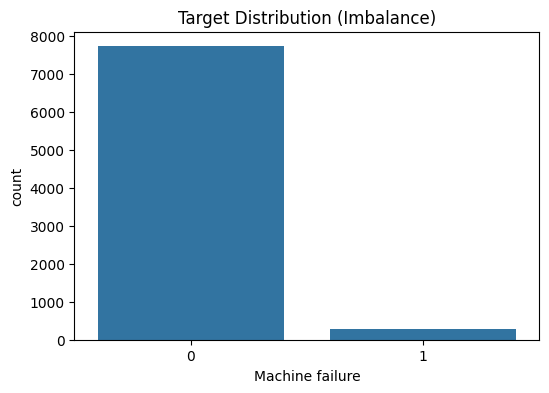

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x="Machine failure", data=maintenance)
plt.title("Target Distribution (Imbalance)")
plt.show()


### 4.2 Feature Distributions (Histograms)
We plot histograms for all numerical attributes to understand their distributions.
**Key aspects to check:**
1.  **Scale Differences:** Do features have vastly different ranges (e.g., Temperature vs. Speed)?
2.  **Distributions:** Are they "Bell-shaped" (Normal) or "Tail-heavy" (Skewed)?
3.  **Outliers:** Are there any isolated bars far from the main group?

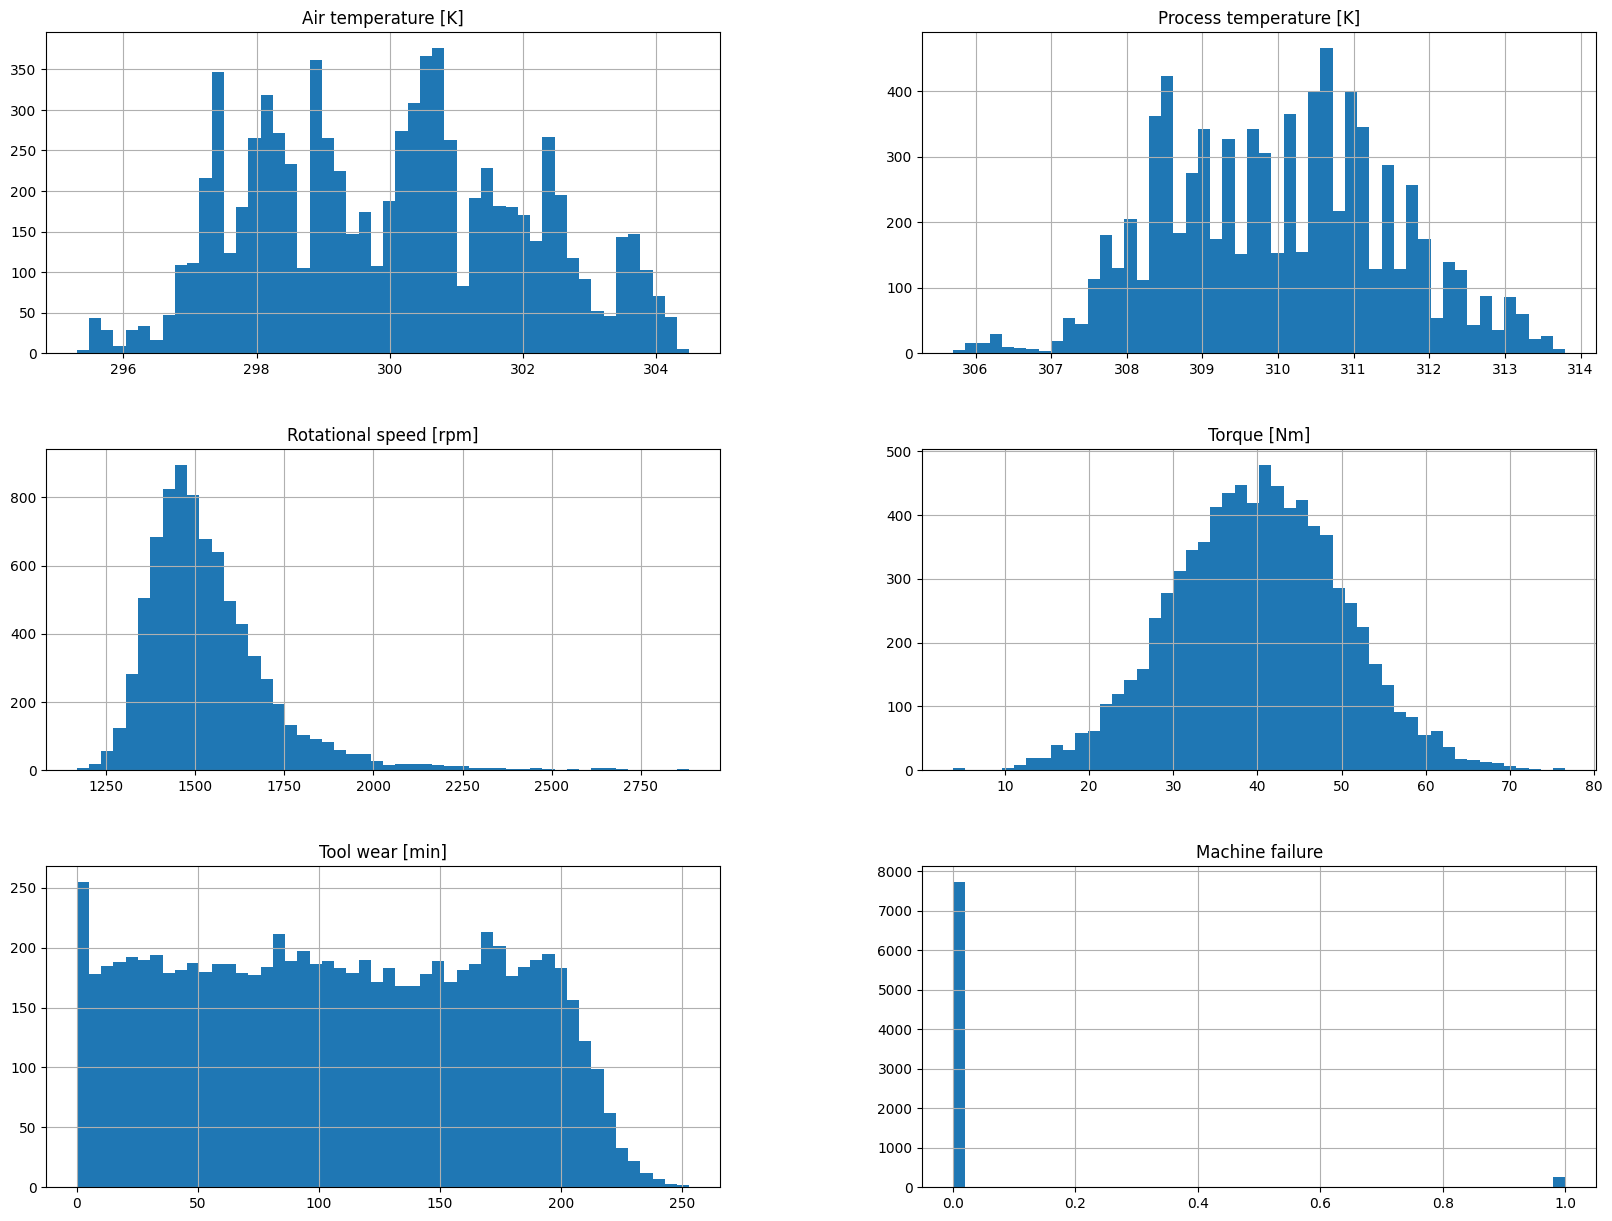

In [ ]:
maintenance.hist(bins=50, figsize=(20, 15))
plt.show()

### 4.3 Looking for Correlations
We compute the **standard correlation coefficient (Pearson’s r)** between every pair of attributes to see how strongly each feature correlates with the target `Machine failure`.
* **Range:** The coefficient ranges from -1 to 1.
* **Close to 1:** Strong positive correlation (e.g., as Torque increases, Failure increases).
* **Close to -1:** Strong negative correlation (e.g., as Speed increases, Failure decreases).
* **Close to 0:** No linear correlation.

In [ ]:
corr_matrix = maintenance.corr(numeric_only=True)

print("Initial Correlations:")
print(corr_matrix["Machine failure"].sort_values(ascending=False))

Initial Correlations:
Machine failure            1.000000
Torque [Nm]                0.190034
Tool wear [min]            0.099214
Air temperature [K]        0.086001
Process temperature [K]    0.040849
Rotational speed [rpm]    -0.039966
Name: Machine failure, dtype: float64


### 4.4 Scatter Plot: Visualizing Failure Boundaries
We visualize the relationship between **Rotational Speed** and **Torque**.
Since Power $P = \tau \times \omega$ (Torque × Speed), we expect failures to cluster in high-power regions.
This plot will help us see if there is a clear "decision boundary" between healthy and failing machines.

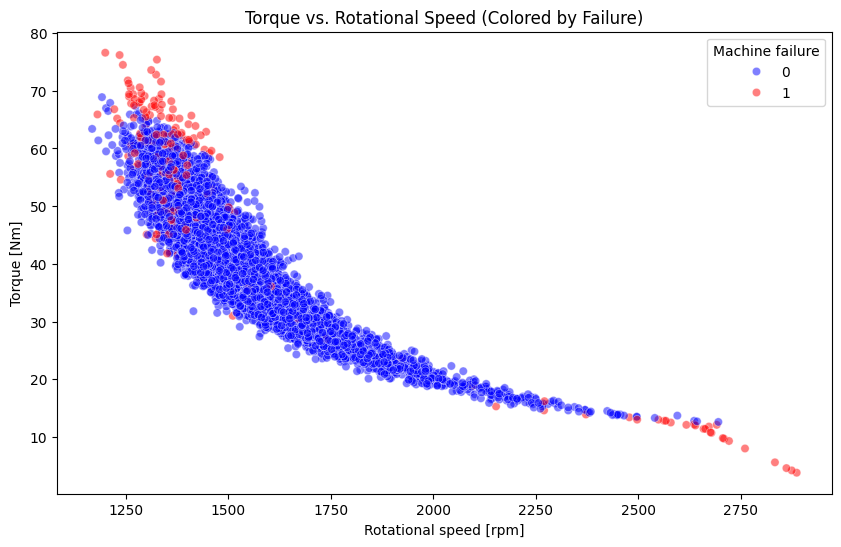

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=maintenance,
    x="Rotational speed [rpm]",
    y="Torque [Nm]",
    hue="Machine failure",
    alpha=0.5,
    palette={0: "blue", 1: "red"}
)
plt.title("Torque vs. Rotational Speed (Colored by Failure)")
plt.show()

### 4.5 Experimenting with Attribute Combinations (Feature Engineering)
Before feeding the data to the machine learning algorithms, we experiment with creating new features based on physical principles:
1.  **Power:** The product of Torque and Rotational Speed ($P = \tau \times \omega$). This captures the mechanical load better than torque or speed alone.
2.  **Temperature Difference:** The difference between Process and Air temperature. This might indicate heat dissipation issues better than raw temperatures.

We then check the correlation matrix again to see if these new features correlate better with `Machine failure`.

In [ ]:
maintenance["power"] = maintenance["Torque [Nm]"] * maintenance["Rotational speed [rpm]"]
maintenance["temp_diff"] = maintenance["Process temperature [K]"] - maintenance["Air temperature [K]"]

corr_matrix = maintenance.corr(numeric_only=True)

print("New Correlations (with engineered features):")
print(corr_matrix["Machine failure"].sort_values(ascending=False))

New Correlations (with engineered features):
Machine failure            1.000000
Torque [Nm]                0.190034
power                      0.175997
Tool wear [min]            0.099214
Air temperature [K]        0.086001
Process temperature [K]    0.040849
Rotational speed [rpm]    -0.039966
temp_diff                 -0.111314
Name: Machine failure, dtype: float64


## 5. Prepare the Data for Machine Learning Algorithms
We revert to the original stratified training set. We separate the **predictors** (features) from the **labels** (target) because we don't want to apply the same transformations to both (e.g., we scale features but not the target).

In [ ]:
machines = strat_train_set.drop("Machine failure", axis=1)

machines_labels = strat_train_set["Machine failure"].copy()

### 5.1 Define Feature Engineering Logic
We define a standalone function to handle all custom transformations.
This function:
1. Creates new physical features (`Power`, `Temp_diff`).
2. Applies **Log Transformation** to `Rotational speed` to fix skewness.
Note: We calculate Power *before* the log transformation to maintain physical accuracy.

In [ ]:
import numpy as np
import pandas as pd

def add_features_and_log_transform(X):
    X_new = X.copy()


    if "Torque [Nm]" in X_new.columns and "Rotational speed [rpm]" in X_new.columns:
        X_new["power"] = X_new["Torque [Nm]"] * X_new["Rotational speed [rpm]"]

    if "Process temperature [K]" in X_new.columns and "Air temperature [K]" in X_new.columns:
        X_new["temp_diff"] = X_new["Process temperature [K]"] - X_new["Air temperature [K]"]

    if "Rotational speed [rpm]" in X_new.columns:
        X_new["Rotational speed [rpm]"] = np.log1p(X_new["Rotational speed [rpm]"])

    return X_new


### 5.2 Build the Full Pipeline
We integrate our custom function into the scikit-learn pipeline.
* **Numeric Features:** Imputation -> Custom Engineering (Log + Power) -> Standardization.
* **Categorical Features:** Ordinal Encoding (Low < Medium < High).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_attribs = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
cat_attribs = ["Type"]

custom_engineer = FunctionTransformer(add_features_and_log_transform, validate=False)

num_pipeline = Pipeline([
    ('feature_eng', custom_engineer),

    ('imputer', SimpleImputer(strategy="median")),

    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs),
])

machines_prepared = full_pipeline.fit_transform(machines)

print("✅ Pipeline executed successfully!")
print(f"Original shape: {machines.shape}")
print(f"New shape: {machines_prepared.shape}")

✅ Pipeline executed successfully!
Original shape: (8000, 6)
New shape: (8000, 8)


✅ Shape: (8000, 8) (Expected: 8 columns)


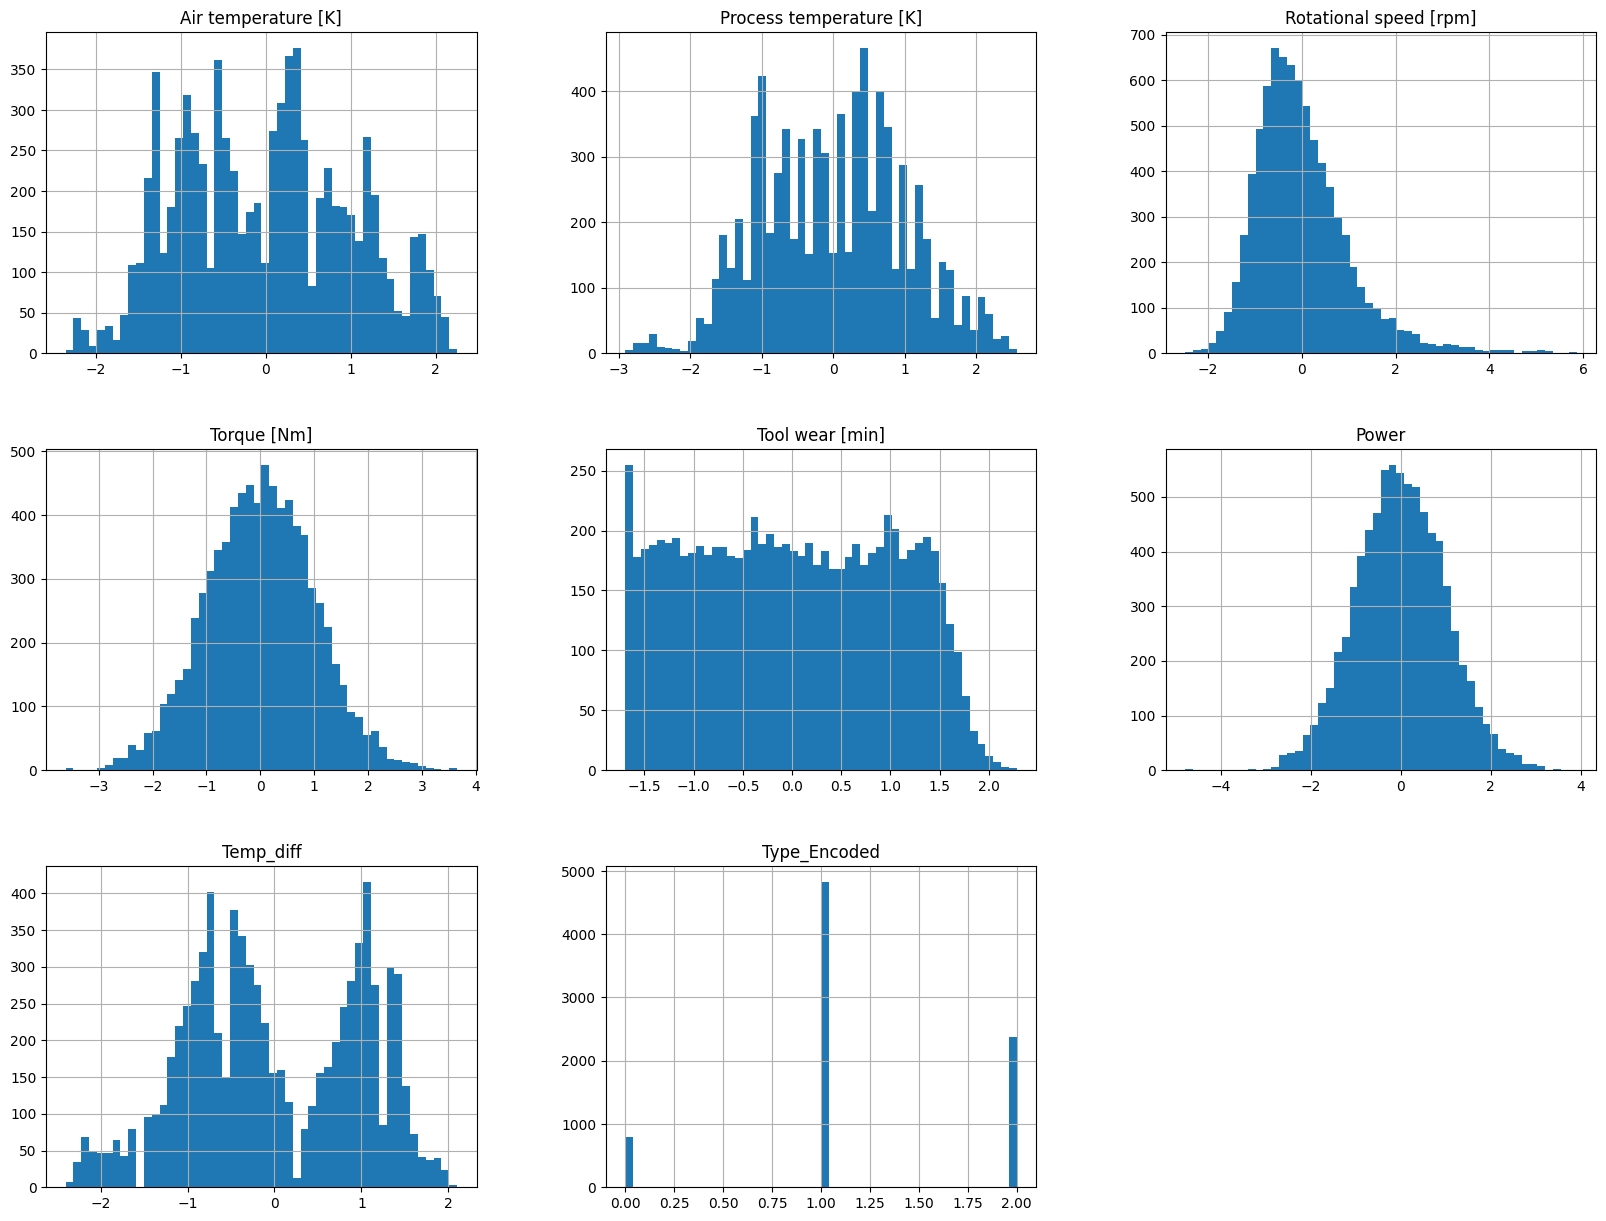

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
    "Power",          # New 1
    "Temp_diff",      # New 2
    "Type_Encoded"    # Ordinal (0, 1, 2)
]

df_prepared = pd.DataFrame(machines_prepared, columns=column_names)

print(f"✅ Shape: {machines_prepared.shape} (Expected: 8 columns)")
df_prepared.hist(bins=50, figsize=(20, 15))
plt.show()

## 6. Select and Train Models

Now that the data is prepared (`machines_prepared`), we proceed to the model selection phase. Given the nature of the problem (Anomaly Detection in an imbalanced dataset), we cannot rely solely on Accuracy.

### 6.1 Comparison Strategy
We will compare three different algorithms against a baseline to select the most promising candidate for fine-tuning.

1.  **The Baseline (Dummy Classifier):**
    * We use a naive classifier that always predicts "No Failure" (the most frequent class).
    * **Goal:** Any useful model must significantly outperform this baseline in terms of **F1-Score**. A high accuracy with an F1-score of 0.0 means the model is useless.

2.  **Candidate Models:**
    * **Logistic Regression:** A linear baseline.
    * **Random Forest:** An ensemble method known for handling non-linear relationships and interactions (e.g., Power = Torque × Speed).
    * **Support Vector Machine (SVM):** Effective in high-dimensional spaces.

3.  **Handling Imbalance:**
    * Since failures represent only ~3.4% of the data, we initialize all models with `class_weight='balanced'`. This forces the algorithms to pay more attention to the minority class (failures) by penalizing false negatives more heavily.

4.  **Evaluation Metric:**
    * We use **Cross-Validation (3-fold)** with **F1-Score** as the primary metric, as it balances Precision (avoiding false alarms) and Recall (detecting actual failures).

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_scores = cross_val_score(dummy_clf, machines_prepared, machines_labels, cv=3, scoring="f1")
print(f"🔹 Dummy Classifier F1: {dummy_scores.mean():.4f} (The Floor)")

models = [
    ("Logistic Regression", LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)),
    ("Random Forest", RandomForestClassifier(class_weight='balanced', random_state=42)),
    ("SVM", SVC(class_weight='balanced', random_state=42))
]

print("-" * 50)
print("📊 Comparing Models (Cross-Validation F1-Score):")

best_score = 0
best_model_name = ""

for name, model in models:
    scores = cross_val_score(model, machines_prepared, machines_labels, cv=3, scoring="f1")
    mean_score = scores.mean()

    print(f"✅ {name}: {mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name

print("-" * 50)
print(f"🏆 The Winner is: {best_model_name} with F1 = {best_score:.4f}")

🔹 Dummy Classifier F1: 0.0000 (The Floor)
--------------------------------------------------
📊 Comparing Models (Cross-Validation F1-Score):
✅ Logistic Regression: 0.2748
✅ Random Forest: 0.7417
✅ SVM: 0.4536
--------------------------------------------------
🏆 The Winner is: Random Forest with F1 = 0.7417


 Hyperparameter Fine-Tuning using Randomized Search

To improve the model's performance beyond the baseline, we perform **Hyperparameter Optimization**.

Instead of using `GridSearchCV` (which can be computationally expensive), we use **`RandomizedSearchCV`**. This method randomly samples a fixed number of parameter settings from specified distributions, allowing us to explore a wider range of values efficiently.

**Key configurations:**
* **Search Space:** We explore a wide range for `n_estimators` (100-600) and various tree depths to find the right balance between complexity and generalization.
* **Metric:** We optimize for **F1-Score** to ensure a balance between Precision and Recall, given the imbalanced nature of our dataset.
* **Iterations:** We run `50` random trials with `3-fold` Cross-Validation.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

print("🎲 Starting Randomized Search for Random Forest...")

param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

forest_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

rnd_search = RandomizedSearchCV(forest_clf, param_dist, n_iter=50,
                                cv=3, scoring='f1', verbose=1, random_state=42, n_jobs=-1)

rnd_search.fit(machines_prepared, machines_labels)

print("-" * 50)
print(f"✅ Best Randomized F1 Score: {rnd_search.best_score_:.4f}")
print("✅ Best Hyperparameters:", rnd_search.best_params_)

final_model = rnd_search.best_estimator_

🎲 Starting Randomized Search for Random Forest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
--------------------------------------------------
✅ Best Randomized F1 Score: 0.8148
✅ Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 575}


 Feature Importance Analysis

One of the significant advantages of Random Forest is its interpretability. It allows us to measure the **Feature Importance**, showing which sensors or variables contributed most to the model's decision-making process.

In this step, we extract and visualize these importance scores from our optimized `final_model`.

**Why is this important?**
1.  **Diagnosis:** It helps us understand the physical causes of failures (e.g., is it high Torque or Heat?).
2.  **Validation:** It allows us to verify if our **Feature Engineering** (adding `Power` and `Temp_diff`) was successful. If these new features appear at the top, it confirms they added value to the model.

🔍 1. Feature Importance Analysis (Based on Random Search)


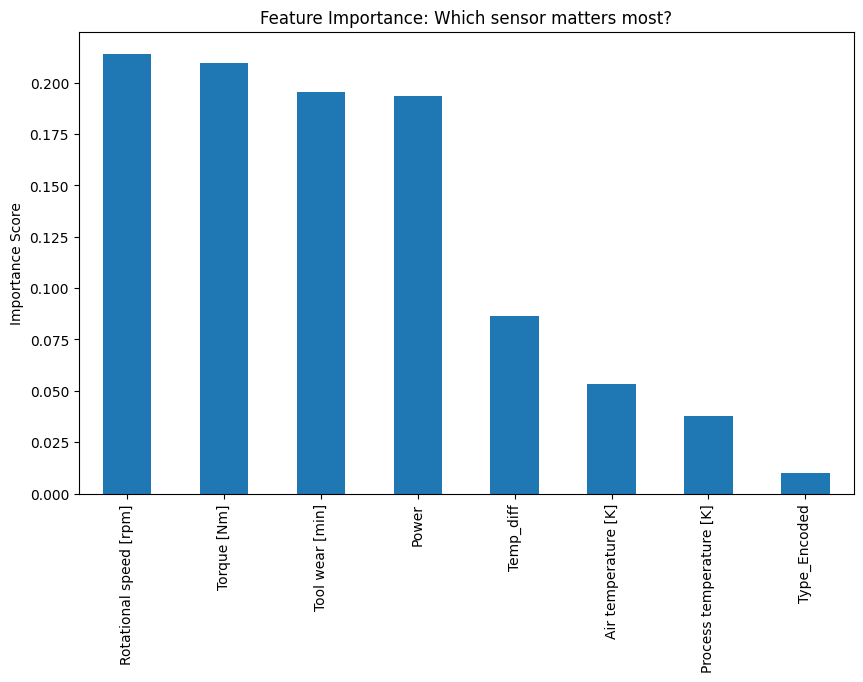

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

print("🔍 1. Feature Importance Analysis (Based on Random Search)")


feature_names = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
    "Power",
    "Temp_diff",
    "Type_Encoded"
]


importances = final_model.feature_importances_


forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_importances.plot.bar()
plt.title("Feature Importance: Which sensor matters most?")
plt.ylabel("Importance Score")
plt.show()

 Precision-Recall Trade-off & Threshold Analysis

By default, a Random Forest Classifier uses a decision threshold of **0.5 (50%)**. This means if the probability of failure is 51%, it predicts "Failure".

However, in Predictive Maintenance, the costs of **False Positives** (unnecessary inspection) and **False Negatives** (missed failure) are not equal.

In this step, we use `cross_val_predict` to generate probability scores (`predict_proba`) instead of binary predictions. We then plot the **Precision** and **Recall** curves against all possible thresholds to answer questions like:
* *"What happens to our Recall if we lower the threshold to 30%?"*
* *"Where is the 'Sweet Spot' where we maximize both metrics?"*

🔍 2. Precision-Recall Curve


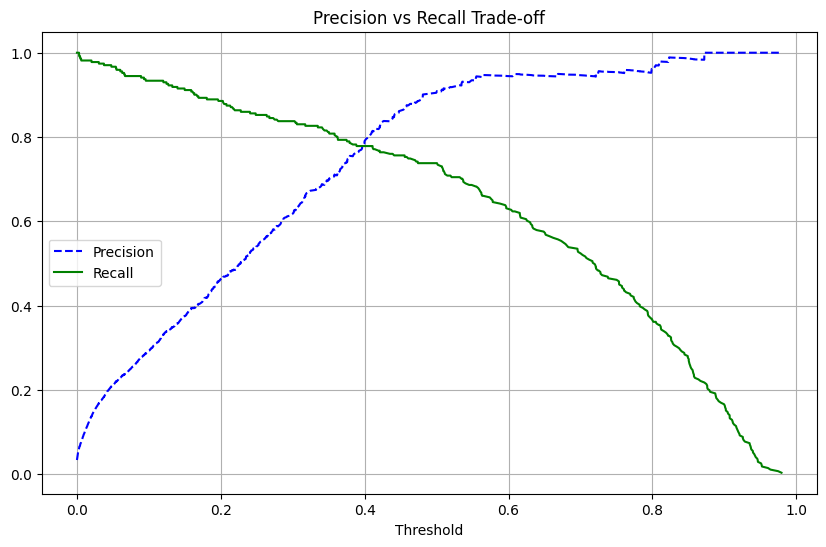

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

print("🔍 2. Precision-Recall Curve")


y_probas = cross_val_predict(final_model, machines_prepared, machines_labels, cv=3, method="predict_proba")

y_scores = y_probas[:, 1]

precisions, recalls, thresholds = precision_recall_curve(machines_labels, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend(loc="center left")
plt.xlabel("Threshold")
plt.title("Precision vs Recall Trade-off")
plt.grid(True)
plt.show()

Final Evaluation on the Test Set

This is the "Moment of Truth". We now evaluate our optimized model on the **Test Set** (`strat_test_set`), which was set aside at the very beginning of the project.

**Crucial Rules followed here:**
1.  **Unseen Data:** The model has *never* seen this data during training or hyperparameter tuning. This gives us an unbiased estimate of real-world performance.
2.  **Transform ONLY:** We run the test data through our `full_pipeline` using `.transform()`, **NOT** `.fit_transform()`. We must apply the exact same scaling and transformation rules learned from the training set.

**We will assess the model using:**
* **F1-Score:** Our primary metric for success (balancing Precision and Recall).
* **Confusion Matrix:** To visualize exactly how many failures were correctly identified versus missed.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

X_test = strat_test_set.drop("Machine failure", axis=1)
y_test = strat_test_set["Machine failure"].copy()


X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_acc = accuracy_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions)
final_conf_mx = confusion_matrix(y_test, final_predictions)

print(f"📊 Final Test Accuracy: {final_acc:.4f}")
print(f"🏆 Final Test F1 Score: {final_f1:.4f}")
print("-" * 20)
print("Confusion Matrix:")
print(final_conf_mx)

🚀 Step 12: Final Evaluation on Test Set
--------------------------------------------------
📊 Final Test Accuracy: 0.9885
🏆 Final Test F1 Score: 0.8189
--------------------
Confusion Matrix:
[[1925    7]
 [  16   52]]
